# Image Data Loading and Visualization
## Functions that read data from CSV file into arrays

In [5]:
from keras.utils import to_categorical
import brewer2mpl
import pandas as pd
import numpy as np
import random
import sys
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

#  Re-classifies a  picture with disgust label into angry label
def emotion_count(y_train, classes):

    emo_classcount = {}
    print ('Disgust classified as Angry')
    
    #locate all values that are disgust (1) in the 'emotion' column, replace with anger (0)
    y_train.loc[y_train==1] = 0

    #remove disgust from classes list
    classes.remove('Disgust')


    for new_num, _class in enumerate(classes):
        y_train.loc[(y_train == emotion[_class])] = new_num
        class_count = sum(y_train == (new_num))
        emo_classcount[_class] = (new_num, class_count)
    return y_train.values, emo_classcount

# Load provided CSV dataset and further reshape, rescale the data for feeding
def load_data(usage='Training', classes=['Angry','Happy'], filepath='fer2013.csv'):

    # Read CSV 
    df = pd.read_csv(filepath)
    df = df[df.Usage == usage]

    frames = []
    classes.append('Disgust')

    # Create a dataframe for each class (emotion) and append it to frames
    for _class in classes:
        class_df = df[df['emotion'] == emotion[_class]]
        frames.append(class_df)
    
    # Concatenate all the dataframes in the list frames to one dataframe "data"
    data = pd.concat(frames, axis=0)
    rows = random.sample(list(data.index), int(len(data)))
    data = data.loc[rows]

    x = list(data["pixels"])
    X = []

    # Determine the pixels for each image 
    for i in range(len(x)):
        each_pixel = [int(num) for num in x[i].split()]
        X.append(each_pixel)

    # reshape into 48*48*1 and rescale
    X = np.array(X)
    X = X.reshape(X.shape[0], 48, 48,1)
    X = X.astype("float32")
    X /= 255

    # return image classification data 
    y_train, new_dict = emotion_count(data.emotion, classes)
    y_train = to_categorical(y_train)
    return X, y_train

## Specify our label conversion and load data

In [6]:
# Label each emotion with a numerical index 
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emo     = ['Angry', 'Fear', 'Happy',
           'Sad', 'Surprise', 'Neutral']

# Unizip the data and set the correct file path 
import zipfile
with zipfile.ZipFile('fer2013.zip','r') as zip_ref:
    zip_ref.extractall()
file_path = 'fer2013.csv'

# Load three sets of data: train, test, validation (find X_train, y_train, X_val, y_val, X_test, y_test using load_data function)
X_train, y_train = load_data(classes=emo)

X_val, y_val = load_data(usage='PrivateTest', classes=emo, filepath=file_path)

X_test, y_test = load_data(usage='PublicTest', classes=emo, filepath=file_path)


Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [7]:
# Print the size of X_train, y_train
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


## Save data to numpy form and count samples in each label category

In [8]:
# Store loaded data into numpy form for further processing
def save_data(X_test, y_test, fname=''):
    np.save( 'X_test' + fname, X_test)
    np.save( 'y_test' + fname, y_test)

save_data(X_test, y_test,"_privatetest6_100pct")
X_fname = 'X_test_privatetest6_100pct.npy'
y_fname = 'y_test_privatetest6_100pct.npy'

# Load images and labels in X and y variables
np.load(X_fname)
np.load(y_fname)

# Convert class probabilities to class indicies and print the count for each class 
print ('Private test set')
y_labels = [np.argmax(lst) for lst in y_train]
counts = np.bincount(y_labels)
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print (labels)
print (counts)

Private test set
['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
[4431 4097 7215 4830 3171 4965]


### Check variable containing label data

In [9]:
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]


## View data by plotting images

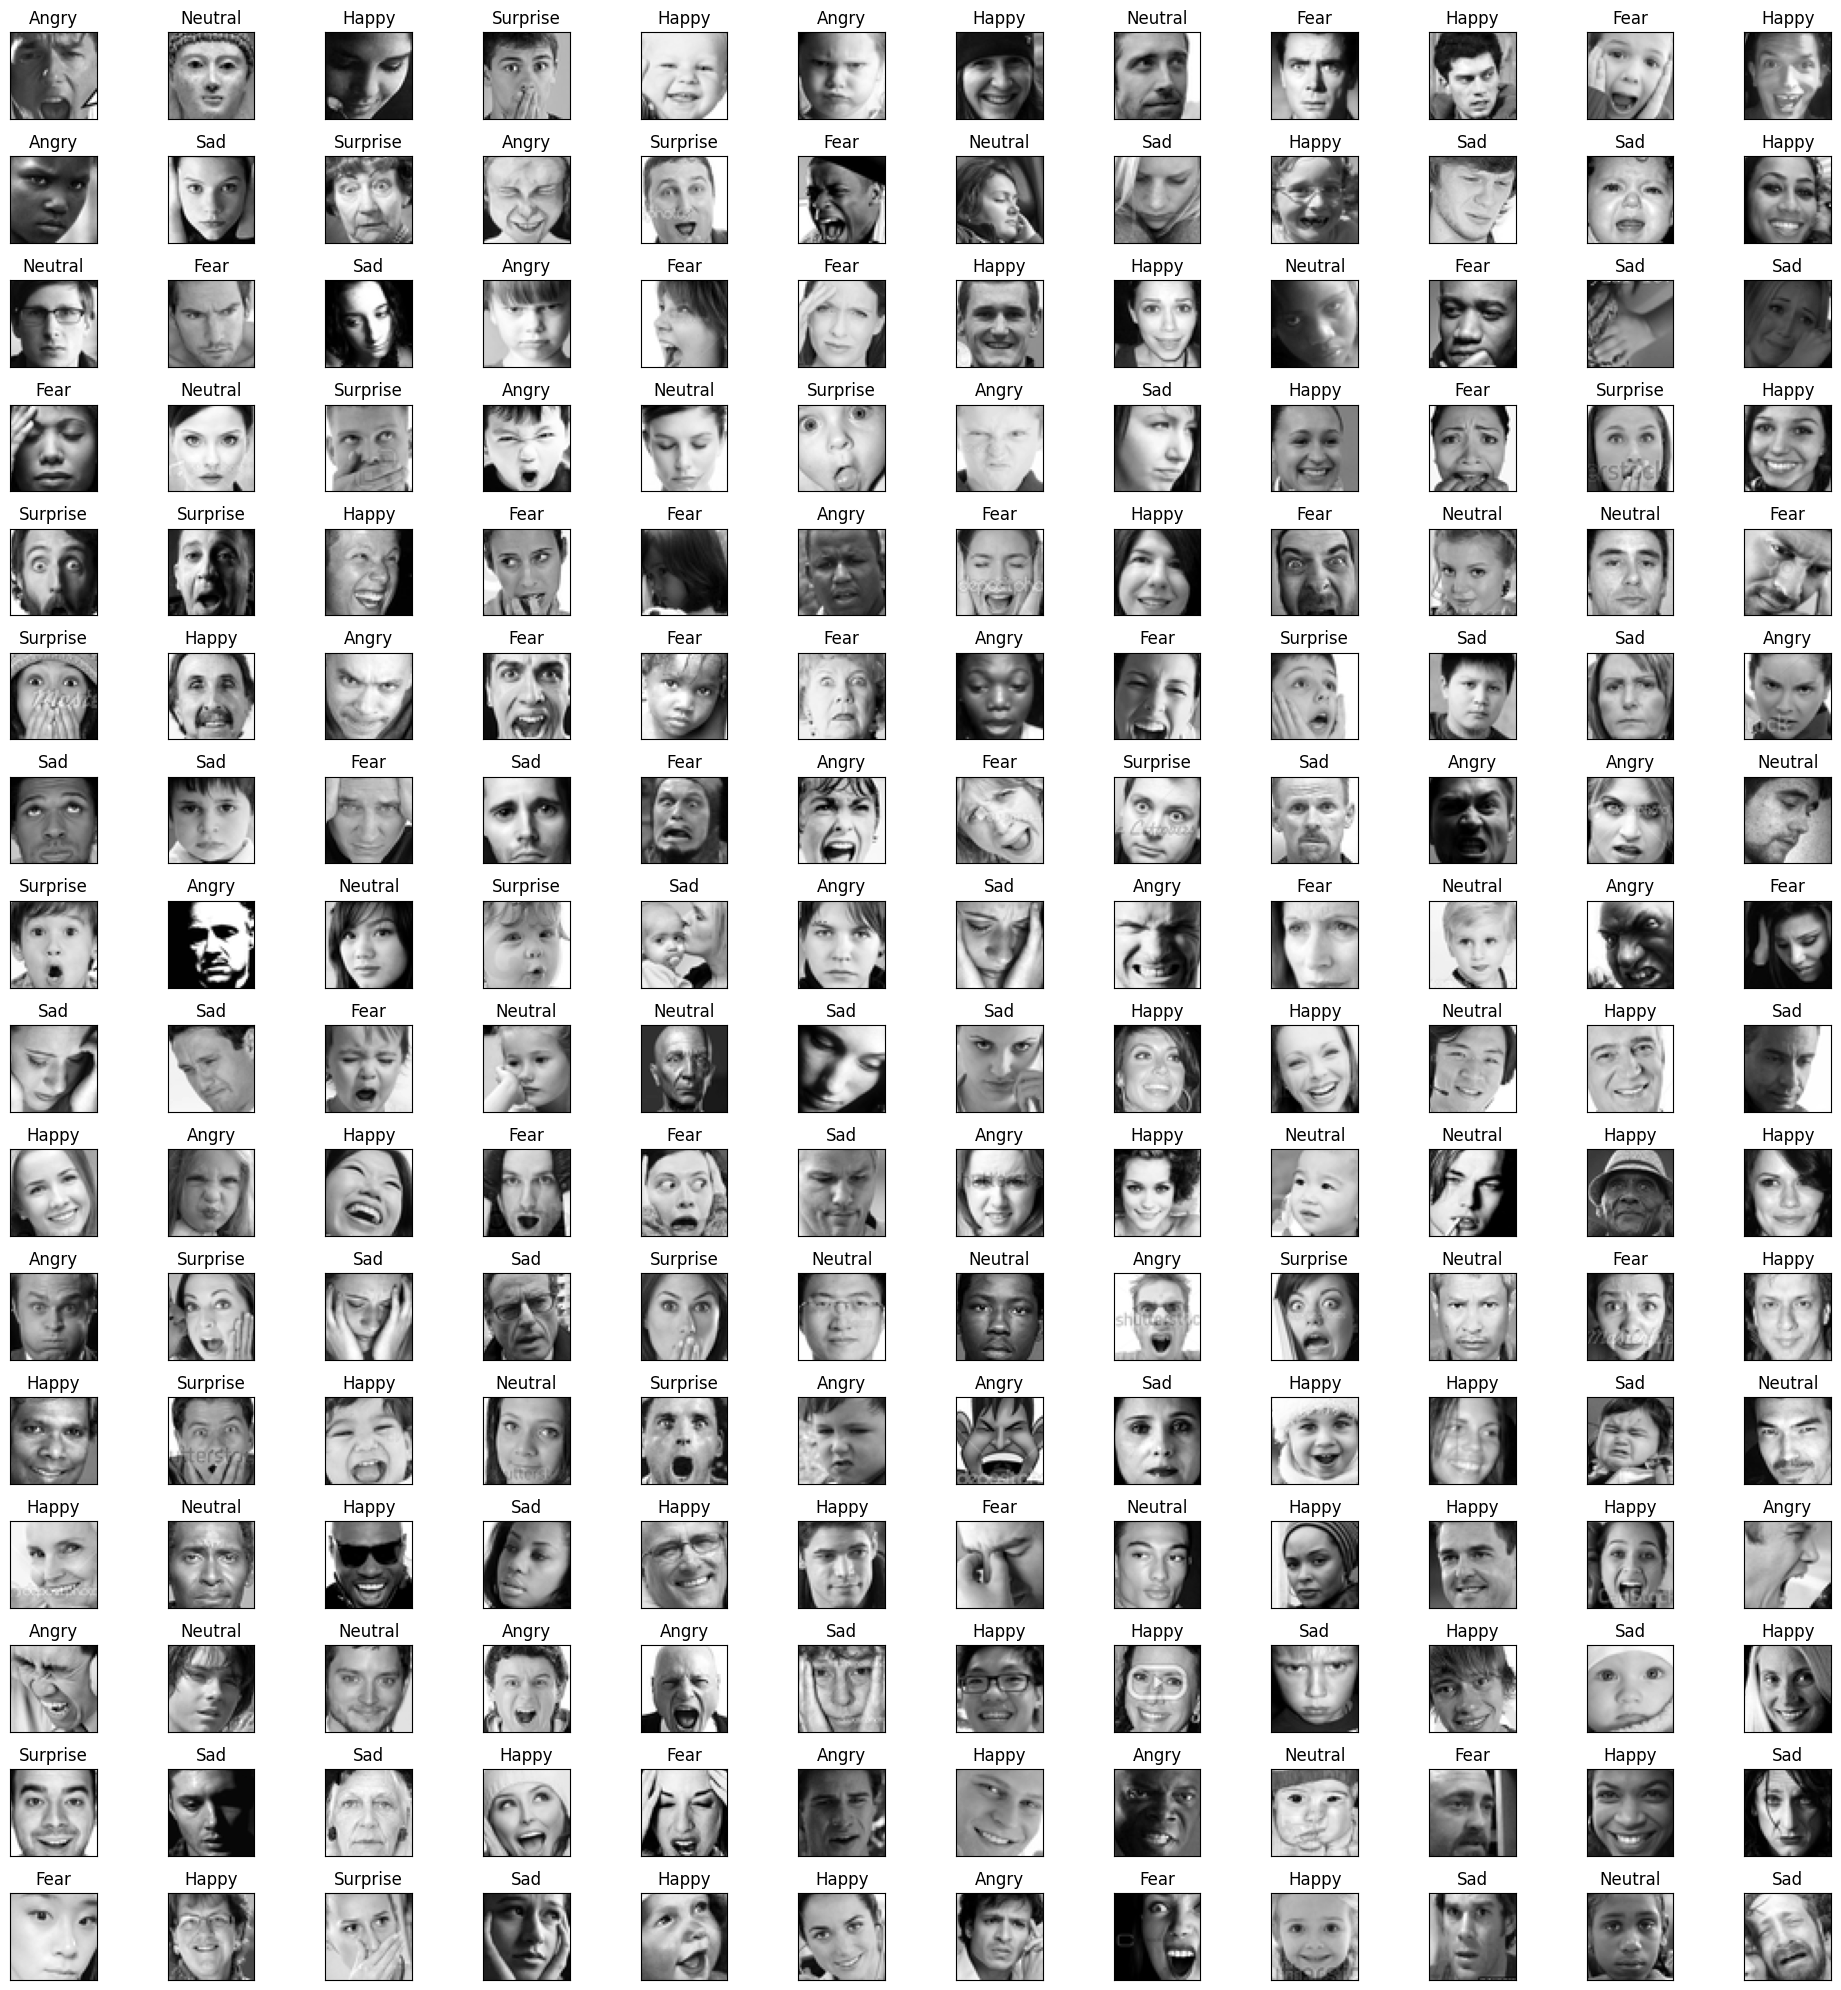

In [10]:
# The function is used to plot first several pictures for overviewing inputs format
def overview(start, end, X):
    # Make a list of labels for each image
    Label_y = []
    for label in y_labels:
      Label_y.append(emo[label])

    # Set figure size
    fig = plt.figure(figsize=(20,20))

    # Create the plot
    for i in range(start, end+1):
        # Add each image to the plot 
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)

        # Label each image with emotion using Label_y list 
        ax.set_title(Label_y[i])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

        # Format tight layout
        plt.tight_layout()

    # Print the images with labelled emotion
    plt.show()
overview(0,191, X_train)

## Plot one image with size

(1, 48, 48, 1)


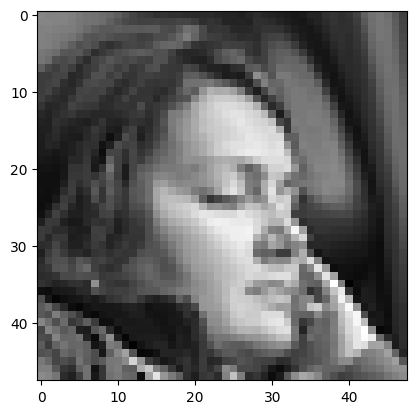

In [12]:
# Choose one image and print its size and display it
image = X_train[18:19, :, :, :]
print(image.shape)
plt.imshow(image[0,:,:,0], cmap='gray')
plt.show()


In [13]:
# Add documentation 
y_train = y_train 
y_public = y_val 
y_private = y_test 
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

## Plot training and validation dataset distributions

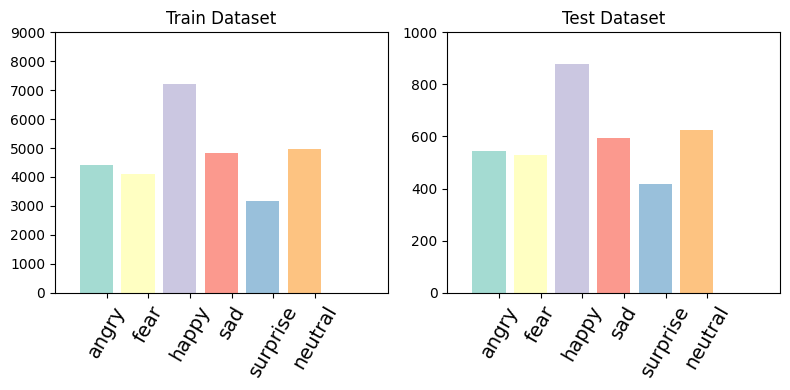

In [14]:
# The function is used to plot the distribution of the labels of provided dataset 
def plot_distribution(y1, y2, data_names, ylims =[1000,1000]): 

    # Set up the plots
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))

    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0, 8])
    ax1.set_ylim([0, ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0, 8])
    ax2.set_ylim([0, ylims[1]])
    ax2.set_title(data_names[1])

    plt.tight_layout()
    plt.show()
    
# Plot the dataset label distributions  
plot_distribution(y_train_labels, y_public_labels, \
                  ['Train Dataset', 'Test Dataset'], \
                  ylims=[9000,1000])
